# 선형회귀(Linear Regression)

본 수업에서는 머신러닝의 가장 간단한 형태인 선형회귀 문제를 해결한다.

경사 하강법을 통해 비용함수를 최적화 시키며 직접 구현하고, 사이킷런과 신경망을 통해 같은 작업을 수행해본다.



In [4]:
# 필요 라이브러리 임포트
import os
import numpy as np  
import pandas as pd 
from matplotlib import pyplot as plt


선형회귀에 필요한 데이터를 로딩한다.
아래 코드를 실행하면 좌측의 파일 탭을 눌렀을 때 2개의 데이터가 다운이 된다.

In [5]:
import os
from six.moves import urllib
for fn_dst in ['ex1data1.txt', 'ex1data2.txt']:
    fn_src = 'https://raw.githubusercontent.com/suakii/22seminar/main/ex1/data/%s' % fn_dst

    if os.path.isfile(fn_dst):
        print('File %s is already downloaded' % fn_dst)
    else:
        print('Downloaded %s' % fn_dst)
        urllib.request.urlretrieve(fn_src, fn_dst)

File ex1data1.txt is already downloaded
File ex1data2.txt is already downloaded


위에서 임포팅한 데이터를 메트플롯을 이용하여 간단하게 그려본다.

먼저 첫 번째 데이터인 ex1data1.txt를 시각화 시켜보자. 해당 데이터는 콤마로 분리된 데이터이므로 넘파이를 통해서 간단하게 처리할 수 있다. 첫 번째 열은 X,두 번째 열은 y변수에 저장한다.

In [21]:
# 콤마로 분리된 데이터 읽기
data = np.loadtxt('ex1data1.txt', delimiter=',')

#실습
#X, y = data[:, 0], data[:, 1]
X, y = 

m = y.size  # 훈련용 데이터의 크기
print(X.shape)
print(y.shape)
print(m)


(97,)
(97,)
97


Text(0.5, 0, 'Population of City in 10,000s')

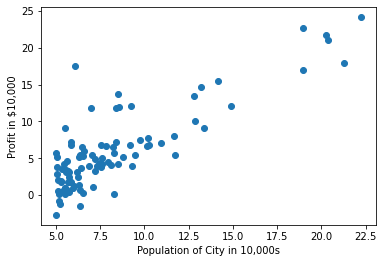

In [8]:
# 그래프 그리기
#plt.plot(X, y, 'ro', ms=10, mec='k')
#plt.scatter(X, y)
# 실습

plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')


반복문을 통한 작업과 넘파이를 이용한 작업 2가지를 실행해본다.


## 1 선형회귀

    통계학에서, 선형 회귀(線型回歸, 영어: linear regression)는 종속 변수 y와 한 개 이상의 독립
    변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다. 한 개의 설명 변수에 
    기반한 경우에는 단순 선형 회귀(simple linear regression), 둘 이상의 설명 변수에 기반한 
    경우에는 다중 선형 회귀라고 한다. 선형 회귀는 선형 예측 함수를 사용해 회귀식을 모델링하며, 
    알려지지 않은 파라미터는 데이터로부터 추정한다. 이렇게 만들어진 회귀식을 선형 모델이라고 한다
    -출처: 위키피디아.

머신러닝에서 선형회귀를 먼저 학습하는 이유는 이 간단한 과정이 머신러닝의 기초적인 것을 대부분 포함하고 있기 때문이다. 이를 확장하여 보다 복잡한 형태의 머신러닝 혹은 딥러닝으로의 학습이 가능하며. 머신러닝 학습의 시작점으로서 충분하다고 생각한다.



###1.1 선형회귀 모델(가설)

![Figures](https://raw.githubusercontent.com/suakii/22seminar/main/ex1/img/regression_result.png)

위 데이터에 대해서 선형회귀 과정은 입력 변수와 출력 변수 사이의 관계를 직선으로 나타낼 수 있는 함수의 절편과 기울기를 찾는 과정이라고 볼 수 있다.

따라서, 위 그림에 대한 선형 모델을 아래와 같이 정의할 수 있다.

$$ 
h_\theta(x) = \theta^TX = \theta_0 + \theta_1 x
$$

위 식의 $\theta^TX$는 입력과 출력을 벡터 형태로 표시한 것이다.

$$
\theta =
\begin{bmatrix}
   \theta_0 \\ \theta_1 
\end{bmatrix}
,
X =
\begin{bmatrix}
   1 \\ x 
\end{bmatrix}
$$

위의 수립된 모델을 바탕으로 우리는 주어진 데이터를 가잘 잘 나타낼 수 있는 직선을 찾아야 한다.

즉, 우리가 찾아야 하는 값(머신러닝의 목표)은 
$$
\theta =
\begin{bmatrix}
   \theta_0 \\ \theta_1 
\end{bmatrix}
$$
이다.




###1.2 오차(Error)
좋은 선형 회귀 모델이란 무엇일까?
결국, 실제 값과 예측한 값의 차이가 작을 수록 해당 모델의 특성을 선형회귀 모델이 잘 설명한다고 할 수 있다.

오차란 예측 값과 실제 값의 차이라고 정의할 수 있다. 최적의 선형 회귀 모델은 오차가 0인 모델일 것이다.
그러나, 데이터의 분포가 직선상에 있지 않다면 오차는 0이 될 수 없을 것이다. 

다음 그래프는 간단한 테스트 자료를 가지고 직선을 그리고 가상의 예측치값을 통해 오차를 시각화 해주고 있다.



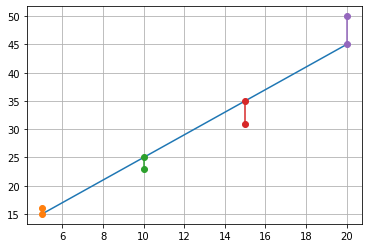

In [ ]:
#그래프
#f(X) = 2X + 5
X_test = np.array([5,10,15, 20]) #X 
Y_test = np.array([16,23,31,50]) #Y
f_x = 2*X_test + 5
plt.plot(X_test, f_x)
#오차를 그려보기
for i in range(len(X_test)):
    x_test = np.array([X_test[i], X_test[i]]) #
    y_test = np.array([f_x[i], Y_test[i]]) #
    plt.plot(x_test, y_test, marker= 'o')
    
plt.grid()
plt.show()

평균제곱오차(MSE:Mean Square Error)
평균제곱 오차는 오차들의 제곱들의 평균을 구해 나타내는 값이며, 다음 수식처럼 나타낼 수 있다.
$$
MSE = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2
$$
분모항에 $2$가 있는 이유는 미분했을 때의 제곱 값을 사라지게 만드는 역할을 한다. 

$h_{\theta}(x^{(i)})$ 는 $i$ 번째 입력 데이터에 대한 예측값을 나타내며, $y^{(i)}$는 실제 값을 의미한다.

둘의 차이가 바로 오차이다.

우리의 목표는 MSE가 최소가 되게 만들어주는 직선을 찾는 것이다. 따라서,
$\theta$에 대해 오차함수(비용함수: Cost Function) $J(\theta)$ 를 다음과 같의 정의할 수 있다.
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2
$$

이제 우리의 문제는 오차함수를 최소로 만들어주는 문제로 바뀌었다. 





###1.3 경사하강법

경사하강법은 머신러닝이나 딥러닝 알고리즘에서 학습시 사용하는 최적화 알고리즘의 하나이다.

다음과 같은 볼록한 함수의 그래프를 생각해보자.
![Figures](https://raw.githubusercontent.com/suakii/22seminar/main/ex1/img/gradient.png)

위의 $x$축은 $W$이며 함수의 최솟값에 도달하기 위해서는 그래프의 각 위치에서 기울기의 반대 방향으로 움직이면 된다. 

즉, 함수의 기울기를 구하고(미분) 기울기가 낮은 쪽으로 계속 이동하다 보면 함수의 최솟값에 도달하게 되는 것이다.
함수가, 위의 비용함수라면 그 지점이 우리가 찾고 있는 매개변수의 값이 되는 것이다.

이제 우리가할 것은, $$
\theta =
\begin{bmatrix}
   \theta_0 \\ \theta_1 
\end{bmatrix}
$$
의 각 요소별로 비용함수를 편미분하고 각 요소를 갱신해주면 되는 것이다.

이를 수식으로 나타내면 다음과 같으며 각 $\theta_j$ 의 값들은 위의 $\theta$ 값들이다.

$$
\theta_j := \theta_j - \alpha\frac{\partial J}{\partial \theta_j} 
$$

이를 각, $\theta$에 대해서 편미분 하고 원래의 값에서 빼주며 $\alpha$(학습률) 값을 곱해 각 파라미터를 갱신시켜 주면 된다.
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2
$$

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( \theta_0 + \theta_1 (x^{(i)}) - y^{(i)}\right)^2
$$



$$
\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)
$$


$$
\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)\cdot x^{(i)}
$$

위 수식을 이용하여 기울기와 절편 값을 계속해서 갱신시켜 나가는 것이 결국은 우리의 목적인 비용 함수를 최소화 하는 두 개의 값을 구하게 되는 것이다.

이를 경사 하강법이라고 한다.

이를 프로그래밍으로 구현하면 다음과 같다.

벡터화된 연산을 처리하기 위해서 $X$ 데이터의 첫 번째 열에 1을 추가한다.



In [22]:
print(X)
print(X.shape)
#실습
#X = np.hstack((np.ones(m).reshape(m,-1),X.reshape(m,-1)))
#X = np.stack([np.ones(m), X], axis=1)

X = 

print(X)
print(X.shape) #(97,2)


[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
(97,)
[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]

In [23]:
def computeCost(X, y, theta):
    m = y.size  
    J = 0
    #실습
    #h = np.dot(X, theta)
    #J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    h = 
    J =
    return J

In [24]:
def gradient_descent(x, y, theta, alpha, iterations):
    J_history = []
    theta_return = np.zeros(2)
   
    
    for i in range(iterations):
        #실습
        # theta_return[0] = theta[0] - (alpha / m) * np.sum(np.dot(x, theta) - y)
        # theta_return[1] = theta[1] - (alpha / m) * np.sum((np.dot(x, theta) - y)*x[:, 1])
        # theta = theta_return
        
        # theta_return[0] = 
        # theta_return[1] = 
        # theta = 
        J_history.append(computeCost(x, y, theta))


    return theta, J_history




In [25]:
theta = np.zeros(2)
theta, J_history = gradient_descent(X, y, theta, 0.01, 1500)


In [26]:
print(theta)
print(J_history)

[-3.63609474  1.16699229]
[6.7371904648700065, 5.932382651817113, 5.901029594450174, 5.8951611327128255, 5.890022325632914, 5.884897797466824, 5.879786486626267, 5.874692588324237, 5.869616971171633, 5.86455974546072, 5.8595208771060205, 5.854500305471091, 5.849497965223089, 5.8445137903610975, 5.839547714957178, 5.834599673292128, 5.829669599879737, 5.824757429470569, 5.819863097051935, 5.8149865378472025, 5.810127687314959, 5.805286481148166, 5.80046285527331, 5.795656745849549, 5.790868089267876, 5.786096822150273, 5.781342881348869, 5.776606203945108, 5.771886727248919, 5.767184388797879, 5.762499126356389, 5.7578308779148575, 5.753179581688872, 5.748545176118379, 5.743927599866875, 5.739326791820594, 5.734742691087699, 5.730175236997475, 5.725624369099521, 5.721090027162961, 5.716572151175638, 5.7120706813433175, 5.707585558088911, 5.70311672205167, 5.698664114086409, 5.694227675262722, 5.689807346864204, 5.685403070387671, 5.681014787542385, 5.676642440249285, 5.67228597064022, 5

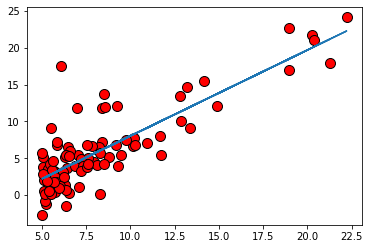

In [27]:
# 실습
#plt.plot(X[:,1], y, 'ro', ms=10, mec='k')
#plt.plot(X[:,1], np.dot(X, theta), '-')

plt.plot()
plt.plot()


Text(0, 0.5, 'Cost J')

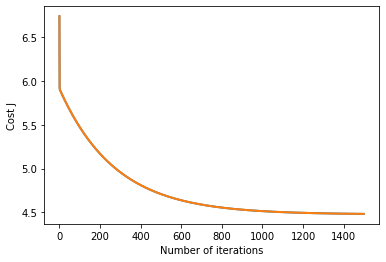

In [28]:
#실습
#plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.plot()

plt.xlabel('Number of iterations')
plt.ylabel('Cost J')



###1.4 scikit-learn

위 경사 하강법을 직접 구현한 방법은 사용하기 복잡할 수 있다.
따라서, 머신러닝 라이브러인 사이킷런을 사용해서 위와 동일한 작업을 다음과 같이 수행해 본다.



In [30]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X[:, 1].reshape(-1, 1), y.reshape(-1,1))


(97,)


LinearRegression()

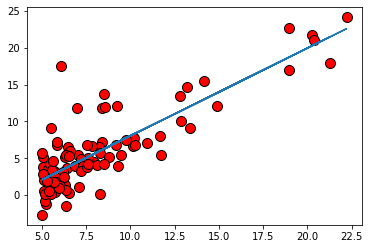

In [ ]:
plt.plot(X[:,1], y, 'ro', ms=10, mec='k')
y_pred = regr.predict(X[:, 1].reshape(-1,1))
plt.plot(X[:,1], y_pred, '-')


###1.5 신경망

위 문제를 이번에는 신경망을 이용해서 풀어본다.



In [ ]:
#simple regression model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
        layers.Dense(1, input_shape=(1,), name='simple')
      ])
  model.compile(loss='mse', optimizer='adam')
  return model
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple (Dense)              (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X[:,1], y, epochs = 500, batch_size=10)

Epoch 1/500
10/10 [==============================] - 1s 5ms/step - loss: 187.7744
Epoch 2/500
10/10 [==============================] - 0s 8ms/step - loss: 185.2654
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 182.6983
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 180.3122
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 177.8878
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 175.5513
Epoch 7/500
10/10 [==============================] - 0s 9ms/step - loss: 173.2204
Epoch 8/500
10/10 [==============================] - 0s 3ms/step - loss: 170.9926
Epoch 9/500
10/10 [==============================] - 0s 8ms/step - loss: 168.7915
Epoch 10/500
10/10 [==============================] - 0s 5ms/step - loss: 166.4482
Epoch 11/500
10/10 [==============================] - 0s 3ms/step - loss: 164.3773
Epoch 12/500
10/10 [==============================] - 0s 4ms/step - loss: 161.9982
Epoch 13/500


In [ ]:
len(history.history['loss'])

500

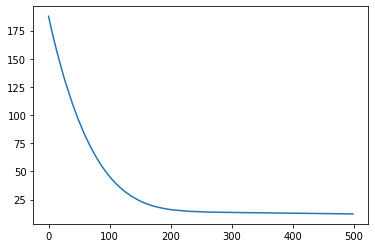

In [ ]:
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'])

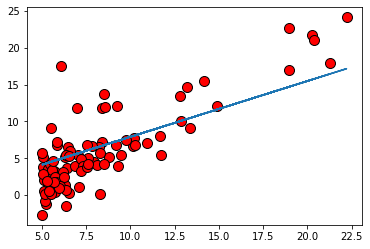

In [ ]:
y_pred_nn = model.predict(X[:,1])
plt.plot(X[:,1], y, 'ro', ms=10, mec='k')
plt.plot(X[:,1], y_pred_nn, '-')